In [2]:
import pandas as pd

#path = "C:\\Users\\Sarth\\OneDrive\\JHU\\HomeEconomics\\New Round Data - 8-18\\County Wise Data (2014 - 22)\\Combined Data.xlsx"

# open sheet name 'Analysis' in 'Combined Data.xlsx' as df
df = pd.read_excel('Combined Data.xlsx', sheet_name='Analysis')

In [3]:
df.shape

(6693, 8)

In [4]:
df= df.dropna()

df.shape, df.columns

((6387, 8),
 Index(['County_fullXWalk', 'state', 'year', 'med_inc', 'population',
        'moe_med_inc', 'all_home_val', 'svf_homes_val'],
       dtype='object'))

In [5]:
import pandas as pd

# Filter relevant columns for 2022

df_2022 = df[['County_fullXWalk', 'state','med_inc', 'all_home_val','year','population']].copy()


df_2022 = df_2022[df_2022['year'] == 2022]

df_2022


,County_fullXWalk,state,med_inc,all_home_val,year,population
326,San Mateo County,CA,145388,1.640318e+06,2022,729181
327,Santa Clara County,CA,150839,1.543995e+06,2022,1870945
328,Marin County,CA,136214,1.524920e+06,2022,256018
401,San Francisco County,CA,136692,1.468203e+06,2022,808437
402,New York County,NY,95866,1.414819e+06,2022,1596273
...,...,...,...,...,...,...
6660,Scioto County,OH,46606,1.189906e+05,2022,72194
6661,Dougherty County,GA,41425,1.070155e+05,2022,82966
6662,Macon County,IL,60332,9.764892e+04,2022,101483
6687,Jefferson County,AR,44584,9.020301e+04,2022,64246


In [6]:
income_25 = df_2022['med_inc'].quantile(0.25)
income_75 = df_2022['med_inc'].quantile(0.75)
income_90 = df_2022['med_inc'].quantile(0.90)
income_10 = df_2022['med_inc'].quantile(0.10)
home_price_25 = df_2022['all_home_val'].quantile(0.25)
home_price_75 = df_2022['all_home_val'].quantile(0.75)
home_price_90 = df_2022['all_home_val'].quantile(0.90)
home_price_10 = df_2022['all_home_val'].quantile(0.10)

In [7]:
# 1. Counties with income in top 25% but home prices in bottom 25%
inc75_home25 = (df_2022['med_inc'] >= income_75) & (df_2022['all_home_val'] <= home_price_25)

# 2. Counties with home prices in top 25% but income in bottom 25%
inc25_home75 = (df_2022['all_home_val'] >= home_price_75) & (df_2022['med_inc'] <= income_25)

# 3. Counties with income in top 10% but home prices in bottom 10%
inc90_home10 = (df_2022['med_inc'] >= income_90) & (df_2022['all_home_val'] <= home_price_10)

# 4. Counties with home prices in top 10% but income in bottom 10%
inc10_home90 = (df_2022['all_home_val'] >= home_price_90) & (df_2022['med_inc'] <= income_10)

In [8]:
# Apply conditions to the data
Hincome_Lprice = df_2022[inc75_home25]
Lincome_Hprice = df_2022[inc25_home75]
VHincome_VLprice = df_2022[inc90_home10]
VLincome_VHprice = df_2022[inc10_home90]

In [9]:
print(f"Counties with High Income and Low Price are {Lincome_Hprice['County_fullXWalk'].values}")

Counties with High Income and Low Price are ['Humboldt County' 'Sevier County' 'Josephine County' 'Bronx County']


In [10]:
Hincome_Lprice, Lincome_Hprice, VHincome_VLprice, VLincome_VHprice

(Empty DataFrame
 Columns: [County_fullXWalk, state, med_inc, all_home_val, year, population]
 Index: [],
       County_fullXWalk state  med_inc   all_home_val  year  population
 1455   Humboldt County    CA    57883  479717.233539  2022      135010
 1654     Sevier County    TN    59315  433197.281284  2022       98789
 1858  Josephine County    OR    53838  407711.570975  2022       87730
 4231      Bronx County    NY    45517  508921.719773  2022     1379946,
 Empty DataFrame
 Columns: [County_fullXWalk, state, med_inc, all_home_val, year, population]
 Index: [],
 Empty DataFrame
 Columns: [County_fullXWalk, state, med_inc, all_home_val, year, population]
 Index: [])

# Full Panel Data Analysis

In [11]:
df_filtered = df[['County_fullXWalk', 'state', 'year', 'med_inc', 'population',
                  'moe_med_inc', 'all_home_val', 'svf_homes_val']].copy()

In [12]:
df_filtered['county_state'] = df_filtered['County_fullXWalk']+", "+df_filtered['state']
df_filtered

,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state
0,District of Columbia,DC,2014,71648,658893,2289,459491.581001,507433.252046,"District of Columbia, DC"
12,District of Columbia,DC,2015,75628,672228,2797,483068.094817,537822.683150,"District of Columbia, DC"
24,District of Columbia,DC,2018,85203,702455,1919,563262.885416,639432.500910,"District of Columbia, DC"
36,District of Columbia,DC,2019,92266,705749,3235,577944.003131,660492.926817,"District of Columbia, DC"
48,District of Columbia,DC,2021,90088,670050,1309,638360.894261,743386.678455,"District of Columbia, DC"
...,...,...,...,...,...,...,...,...,...
6688,Vermilion County,IL,2022,51515,72337,3128,77321.693018,275588.846809,"Vermilion County, IL"
6689,Laramie County,WY,2016,62221,98136,1617,251966.034889,253654.675297,"Laramie County, WY"
6690,Natrona County,WY,2016,59474,81039,5368,214014.018858,214668.173300,"Natrona County, WY"
6691,Laramie County,WY,2017,61961,98327,3235,263845.311232,265564.980734,"Laramie County, WY"


In [13]:
df_filtered['percentile_med_inc'] = df_filtered.groupby('year')['med_inc'].rank(pct=True) * 100
df_filtered['percentile_home_val'] = df_filtered.groupby('year')['all_home_val'].rank(pct=True) * 100


In [14]:
# Split the dataframe into before and after 2021
df_before_2021 = df_filtered[df_filtered['year'] < 2021]
df_2021_and_after = df_filtered[df_filtered['year'] >= 2021]

## Analyzing before 2021

In [15]:
df_before_2021

,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state,percentile_med_inc,percentile_home_val
0,District of Columbia,DC,2014,71648,658893,2289,459491.581001,507433.252046,"District of Columbia, DC",87.836108,97.055058
12,District of Columbia,DC,2015,75628,672228,2797,483068.094817,537822.683150,"District of Columbia, DC",89.030612,97.066327
24,District of Columbia,DC,2018,85203,702455,1919,563262.885416,639432.500910,"District of Columbia, DC",90.174129,96.641791
36,District of Columbia,DC,2019,92266,705749,3235,577944.003131,660492.926817,"District of Columbia, DC",92.307692,96.401985
72,District of Columbia,DC,2017,82372,693972,4452,533286.343087,601087.658516,"District of Columbia, DC",90.161893,96.637609
...,...,...,...,...,...,...,...,...,...,...,...
6684,Natrona County,WY,2019,65034,79858,1719,211759.925540,212852.521339,"Natrona County, WY",58.933002,51.488834
6689,Laramie County,WY,2016,62221,98136,1617,251966.034889,253654.675297,"Laramie County, WY",70.263488,78.168130
6690,Natrona County,WY,2016,59474,81039,5368,214014.018858,214668.173300,"Natrona County, WY",62.609787,66.750314
6691,Laramie County,WY,2017,61961,98327,3235,263845.311232,265564.980734,"Laramie County, WY",64.632628,77.459527


In [16]:
import numpy as np

df_before_2021['avg_perc_income_pre2021'] = df_before_2021.groupby('county_state')['percentile_med_inc'].transform('mean')
df_before_2021['avg_perc_price_pre2021'] = df_before_2021.groupby('county_state')['percentile_home_val'].transform('mean')


df_before_2021

/var/folders/b2/9rsg81y55wg0tr9pnv59jk7r0000gn/T/ipykernel_53582/3183882300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2021['avg_perc_income_pre2021'] = df_before_2021.groupby('county_state')['percentile_med_inc'].transform('mean')
/var/folders/b2/9rsg81y55wg0tr9pnv59jk7r0000gn/T/ipykernel_53582/3183882300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2021['avg_perc_price_pre2021'] = df_before_2021.groupby('county_state')['percentile_home_val'].transform('mean')


,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state,percentile_med_inc,percentile_home_val,avg_perc_income_pre2021,avg_perc_price_pre2021
0,District of Columbia,DC,2014,71648,658893,2289,459491.581001,507433.252046,"District of Columbia, DC",87.836108,97.055058,89.389338,96.819491
12,District of Columbia,DC,2015,75628,672228,2797,483068.094817,537822.683150,"District of Columbia, DC",89.030612,97.066327,89.389338,96.819491
24,District of Columbia,DC,2018,85203,702455,1919,563262.885416,639432.500910,"District of Columbia, DC",90.174129,96.641791,89.389338,96.819491
36,District of Columbia,DC,2019,92266,705749,3235,577944.003131,660492.926817,"District of Columbia, DC",92.307692,96.401985,89.389338,96.819491
72,District of Columbia,DC,2017,82372,693972,4452,533286.343087,601087.658516,"District of Columbia, DC",90.161893,96.637609,89.389338,96.819491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,Natrona County,WY,2019,65034,79858,1719,211759.925540,212852.521339,"Natrona County, WY",58.933002,51.488834,60.531423,61.392132
6689,Laramie County,WY,2016,62221,98136,1617,251966.034889,253654.675297,"Laramie County, WY",70.263488,78.168130,68.433972,77.847615
6690,Natrona County,WY,2016,59474,81039,5368,214014.018858,214668.173300,"Natrona County, WY",62.609787,66.750314,60.531423,61.392132
6691,Laramie County,WY,2017,61961,98327,3235,263845.311232,265564.980734,"Laramie County, WY",64.632628,77.459527,68.433972,77.847615


In [17]:

df_consolidation = df_before_2021[['county_state','avg_perc_income_pre2021', 'avg_perc_price_pre2021']].drop_duplicates()

df_consolidation

,county_state,avg_perc_income_pre2021,avg_perc_price_pre2021
0,"District of Columbia, DC",89.389338,96.819491
75,"Fairbanks North Star Borough, AK",83.598535,73.409382
97,"Shelby County, AL",81.703936,67.672511
98,"Madison County, AL",66.108814,47.161265
99,"Elmore County, AL",53.796798,46.275972
...,...,...,...
6625,"Harrison County, WV",27.395501,11.428623
6626,"Raleigh County, WV",8.595766,3.865318
6627,"Cabell County, WV",2.502349,7.733361
6677,"Laramie County, WY",68.433972,77.847615


## Analyzing for 2021 and beyond

In [18]:
import numpy as np

df_2021_and_after['avg_perc_income_post2021'] = df_2021_and_after.groupby('county_state')['percentile_med_inc'].transform('mean')
df_2021_and_after['avg_perc_price_post2021'] = df_2021_and_after.groupby('county_state')['percentile_home_val'].transform('mean')


df_2021_and_after

/var/folders/b2/9rsg81y55wg0tr9pnv59jk7r0000gn/T/ipykernel_53582/2304482627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_and_after['avg_perc_income_post2021'] = df_2021_and_after.groupby('county_state')['percentile_med_inc'].transform('mean')
/var/folders/b2/9rsg81y55wg0tr9pnv59jk7r0000gn/T/ipykernel_53582/2304482627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_and_after['avg_perc_price_post2021'] = df_2021_and_after.groupby('county_state')['percentile_home_val'].transform('mea

,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state,percentile_med_inc,percentile_home_val,avg_perc_income_post2021,avg_perc_price_post2021
48,District of Columbia,DC,2021,90088,670050,1309,638360.894261,743386.678455,"District of Columbia, DC",86.988848,95.415118,88.898150,94.664081
87,Fairbanks North Star Borough,AK,2021,72149,95593,4504,283071.809885,289174.280417,"Fairbanks North Star Borough, AK",65.055762,58.859975,70.043409,55.082162
181,Shelby County,AL,2021,84260,226902,3003,297109.162443,299251.943837,"Shelby County, AL",82.156134,63.444857,85.301669,63.026777
182,Madison County,AL,2021,78525,395211,4072,260066.628791,262531.626625,"Madison County, AL",74.597274,50.433705,71.894910,51.800703
183,Limestone County,AL,2021,66796,107517,4000,271952.875849,272303.331055,"Limestone County, AL",54.151177,54.151177,65.274346,54.715340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Macon County,IL,2022,60332,101483,1690,97648.919229,139397.117914,"Macon County, IL",23.602484,0.372671,14.093683,0.434167
6685,Natrona County,WY,2021,63605,79555,2508,243976.040676,245334.072759,"Natrona County, WY",43.618340,45.105328,45.597990,43.298006
6686,Laramie County,WY,2021,61381,100863,6245,342832.794430,345023.066419,"Laramie County, WY",38.289963,73.605948,45.418273,69.784340
6687,Jefferson County,AR,2022,44584,64246,2187,90203.007152,134861.904146,"Jefferson County, AR",0.993789,0.248447,4.152409,0.248139


In [19]:
df_consolidation2 = df_2021_and_after[['county_state', 'avg_perc_income_post2021', 'avg_perc_price_post2021']].drop_duplicates()

df_consolidation2

,county_state,avg_perc_income_post2021,avg_perc_price_post2021
48,"District of Columbia, DC",88.898150,94.664081
87,"Fairbanks North Star Borough, AK",70.043409,55.082162
181,"Shelby County, AL",85.301669,63.026777
182,"Madison County, AL",71.894910,51.800703
183,"Limestone County, AL",65.274346,54.715340
...,...,...,...
6220,"Loudoun County, VA",100.000000,95.905547
6384,"Harrison County, WV",15.636011,6.512503
6560,"Cabell County, WV",5.956576,3.473335
6572,"Kanawha County, WV",17.859567,1.798625


In [20]:
# Assuming df_consolidation and df_consolidation2 have both 'County_fullXWalk' and 'state' columns to join on
df_cons = pd.merge(df_consolidation, df_consolidation2, on=['county_state'], how='inner')  # or how='outer', 'left', 'right' depending on your needs

df_cons

,county_state,avg_perc_income_pre2021,avg_perc_price_pre2021,avg_perc_income_post2021,avg_perc_price_post2021
0,"District of Columbia, DC",89.389338,96.819491,88.898150,94.664081
1,"Fairbanks North Star Borough, AK",83.598535,73.409382,70.043409,55.082162
2,"Shelby County, AL",81.703936,67.672511,85.301669,63.026777
3,"Madison County, AL",66.108814,47.161265,71.894910,51.800703
4,"Elmore County, AL",53.796798,46.275972,41.762913,35.048989
...,...,...,...,...,...
791,"Harrison County, WV",27.395501,11.428623,15.636011,6.512503
792,"Raleigh County, WV",8.595766,3.865318,3.601715,1.116627
793,"Cabell County, WV",2.502349,7.733361,5.956576,3.473335
794,"Laramie County, WY",68.433972,77.847615,45.418273,69.784340


In [21]:
df_cons['income_transition_down'] = (df_cons['avg_perc_income_pre2021']>60) & (df_cons['avg_perc_income_post2021']<40)
df_cons['price_transition_down'] = (df_cons['avg_perc_price_pre2021']>60) & (df_cons['avg_perc_price_post2021']<40)
df_cons['income_transition_up'] = (df_cons['avg_perc_income_pre2021']<40) & (df_cons['avg_perc_income_post2021']>60)
df_cons['price_transition_up'] = (df_cons['avg_perc_price_pre2021']<40) & (df_cons['avg_perc_price_post2021']>60)

df_cons['home_expensive'] = (
    (df_cons['avg_perc_price_pre2021'] < 40) & 
    (df_cons['avg_perc_price_post2021'] > 60) & 
    (df_cons['avg_perc_income_pre2021'] < 50) & 
    (df_cons['avg_perc_income_post2021'] < 50)
)

In [22]:
counties_with_income_transition_down = df_cons['county_state'].where(df_cons['income_transition_down'] == True).dropna()

# Print the result
print(f"Counties with income transition up are: {', '.join(counties_with_income_transition_down)}")

Counties with income transition up are: Ector County, TX


In [23]:
counties_with_income_transition_up = df_cons['county_state'].where(df_cons['income_transition_up'] == True).dropna()

# Print the result
print(f"Counties with income transition up are: {', '.join(counties_with_income_transition_up)}")

Counties with income transition up are: Newton County, GA


In [24]:
counties_with_price_transition_down = df_cons['county_state'].where(df_cons['price_transition_down'] == True).dropna()

# Print the result
print(f"Counties with price transition up are: {', '.join(counties_with_price_transition_down)}")

Counties with price transition up are: Ward County, ND


In [25]:
counties_with_price_transition_up = df_cons['county_state'].where(df_cons['price_transition_up'] == True).dropna()

# Print the result
print(f"Counties with price transition up are: {', '.join(counties_with_price_transition_up)}")

Counties with price transition up are: Grays Harbor County, WA


In [26]:
homes_expensive = df_cons['county_state'].where(df_cons['home_expensive'] == True).dropna()

# Print the result
print(f"Counties with price transition up are: {', '.join(homes_expensive)}")

Counties with price transition up are: Grays Harbor County, WA


## Reusing full data

In [27]:
df_filtered.columns

Index(['County_fullXWalk', 'state', 'year', 'med_inc', 'population',
       'moe_med_inc', 'all_home_val', 'svf_homes_val', 'county_state',
       'percentile_med_inc', 'percentile_home_val'],
      dtype='object')

In [28]:
df_filtered.head(5)

,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state,percentile_med_inc,percentile_home_val
0,District of Columbia,DC,2014,71648,658893,2289,459491.581001,507433.252046,"District of Columbia, DC",87.836108,97.055058
12,District of Columbia,DC,2015,75628,672228,2797,483068.094817,537822.683150,"District of Columbia, DC",89.030612,97.066327
24,District of Columbia,DC,2018,85203,702455,1919,563262.885416,639432.500910,"District of Columbia, DC",90.174129,96.641791
36,District of Columbia,DC,2019,92266,705749,3235,577944.003131,660492.926817,"District of Columbia, DC",92.307692,96.401985
48,District of Columbia,DC,2021,90088,670050,1309,638360.894261,743386.678455,"District of Columbia, DC",86.988848,95.415118


In [29]:
df_2014 = df_filtered[df_filtered['year'] == 2014]
df_2022 = df_filtered[df_filtered['year'] == 2022]

direct_calc_df = pd.merge(df_2014[['county_state', 'med_inc','all_home_val']],
                     df_2022[['county_state', 'med_inc','all_home_val']],
                     on='county_state',
                     suffixes=('_2014', '_2022'))

direct_calc_df.head(2)

,county_state,med_inc_2014,all_home_val_2014,med_inc_2022,all_home_val_2022
0,"District of Columbia, DC",71648,459491.581001,101027,648305.712789
1,"Fairbanks North Star Borough, AK",69820,220230.811734,83519,300192.020824


In [30]:
direct_calc_df['inc_change'] = direct_calc_df['med_inc_2022']-direct_calc_df['med_inc_2014']
direct_calc_df['inc_change_avg'] = (direct_calc_df['med_inc_2022']-direct_calc_df['med_inc_2014'])/8
direct_calc_df['price_change'] = direct_calc_df['all_home_val_2022'] - direct_calc_df['all_home_val_2014']
direct_calc_df['price_change_avg'] = (direct_calc_df['all_home_val_2022'] - direct_calc_df['all_home_val_2014'])/8

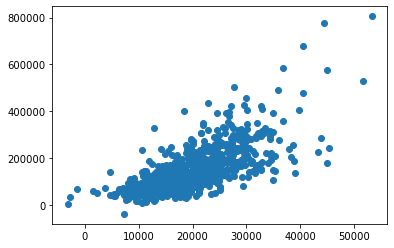

In [31]:
import matplotlib.pyplot as plt

plt.scatter(direct_calc_df['inc_change'], direct_calc_df['price_change'])

Text(0.5, 1.0, 'Change in Income and Home Price between 2014 and 2022')

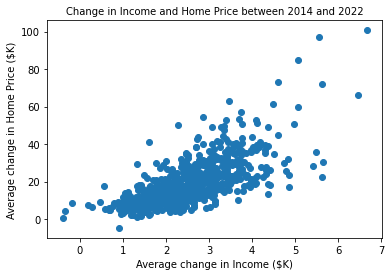

In [32]:
import matplotlib.pyplot as plt

plt.scatter(direct_calc_df['inc_change_avg']/1000, direct_calc_df['price_change_avg']/1000)
plt.xlabel('Average change in Income ($K)')
plt.ylabel('Average change in Home Price ($K)')
plt.title('Change in Income and Home Price between 2014 and 2022', size = 10)

In [33]:
# Filter the DataFrame for the specified conditions
outlier_Hinc_Lpr = direct_calc_df['county_state'].where(
    (direct_calc_df['price_change_avg'] > 40000) & 
    (direct_calc_df['price_change_avg'] < 60000) & 
    (direct_calc_df['inc_change_avg'] > 1000) & 
    (direct_calc_df['inc_change_avg'] < 2000)
).dropna()

# Print the filtered county_state values
print(outlier_Hinc_Lpr)


32    Coconino County, AZ
Name: county_state, dtype: object


In [34]:
outlier_Hinc_Lpr

32    Coconino County, AZ
Name: county_state, dtype: object

In [35]:
# Filter the DataFrame for the specified conditions
outlier_Linc_Hpr = direct_calc_df['county_state'].where(
    (direct_calc_df['price_change_avg'] > 20000) & 
    (direct_calc_df['price_change_avg'] < 30000) & 
    (direct_calc_df['inc_change_avg'] > 5500) & 
    (direct_calc_df['inc_change_avg'] < 6000)
).dropna()

# Print the filtered county_state values
print(outlier_Linc_Hpr)


685    Stafford County, VA
Name: county_state, dtype: object


In [36]:
outlier_Linc_Hpr

685    Stafford County, VA
Name: county_state, dtype: object

## Replaying full dataset to understand time variance

In [37]:
df_red = df.dropna()
df_red['county_state'] = df_red['County_fullXWalk']+ ", " + df_red['state']

df_red['county_state_count'] = df_red['county_state'].map(df_red['county_state'].value_counts())

df_red_all = df_red[df_red['county_state_count'] >= 8]

df_red_all.shape, df_red.shape, df_red_all.columns

((6096, 10),
 (6387, 10),
 Index(['County_fullXWalk', 'state', 'year', 'med_inc', 'population',
        'moe_med_inc', 'all_home_val', 'svf_homes_val', 'county_state',
        'county_state_count'],
       dtype='object'))

In [38]:
df_red_all_2022 = df_red_all[df_red_all['year']==2022]

df_red_all_2022_sorted = df_red_all_2022.sort_values('all_home_val')
df_red_all_2022_sorted_lowpop = df_red_all_2022_sorted[df_red_all_2022_sorted['population']<100000]


df_red_all_2022_sorted

,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state,county_state_count
6688,Vermilion County,IL,2022,51515,72337,3128,7.732169e+04,2.755888e+05,"Vermilion County, IL",8
6687,Jefferson County,AR,2022,44584,64246,2187,9.020301e+04,1.348619e+05,"Jefferson County, AR",8
6662,Macon County,IL,2022,60332,101483,1690,9.764892e+04,1.393971e+05,"Macon County, IL",8
6661,Dougherty County,GA,2022,41425,82966,2523,1.070155e+05,1.702470e+05,"Dougherty County, GA",8
6660,Scioto County,OH,2022,46606,72194,4018,1.189906e+05,2.215678e+05,"Scioto County, OH",8
...,...,...,...,...,...,...,...,...,...,...
402,New York County,NY,2022,95866,1596273,4178,1.414819e+06,1.446962e+06,"New York County, NY",8
401,San Francisco County,CA,2022,136692,808437,3304,1.468203e+06,8.330498e+05,"San Francisco County, CA",8
328,Marin County,CA,2022,136214,256018,3736,1.524920e+06,9.254106e+05,"Marin County, CA",8
327,Santa Clara County,CA,2022,150839,1870945,2595,1.543995e+06,9.046256e+05,"Santa Clara County, CA",8


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

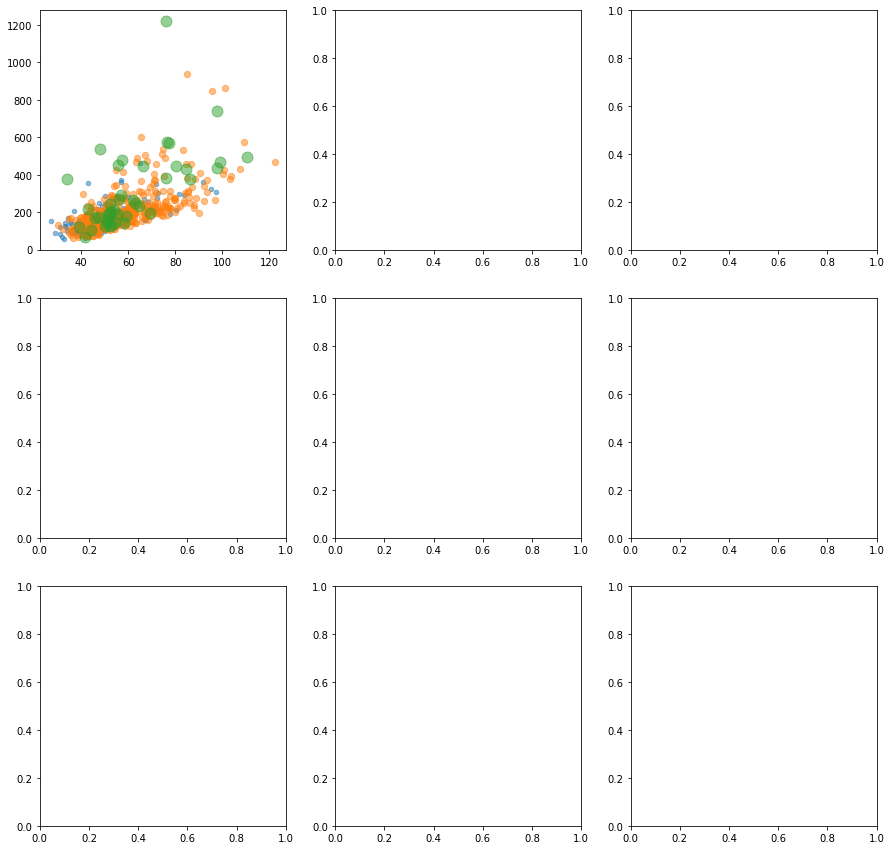

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the years of interest
years = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]

# Set up the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Define thresholds for small, medium, and large cities based on typical population sizes
small_threshold = 100000
large_threshold = 1000000

# Loop through each year
for i, year in enumerate(years):
    # Filter the data for the specific year
    df_year = df_red_all[df_red_all['year'] == year]
    
    # Filter out rows where population is 0
    df_year = df_year[df_year['population'] > 0]
    
    # Categorize population into small, medium, and large cities
    def categorize_city(pop):
        if pop < small_threshold:
            return 'Small (<100K)'
        elif small_threshold <= pop <= large_threshold:
            return 'Medium (100K-1M)'
        else:
            return 'Large (>1M)'
    
    df_year['City_Size'] = df_year['population'].apply(categorize_city)
    
    # Prepare data for regression
    X = df_year['med_inc'].values.reshape(-1, 1) / 1000  # Convert to thousands
    y = df_year['all_home_val'].values / 1000  # Convert to thousands
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatter plot with different sizes for small, medium, and large cities
    for city_size, size in [('Small (<100K)', 20), ('Medium (100K-1M)', 40), ('Large (>1M)', 120)]:
        df_city_size = df_year[df_year['City_Size'] == city_size]
        
        axes[i].scatter(df_city_size['med_inc'] / 1000, df_city_size['all_home_val'] / 1000, s=size, label=city_size, alpha=0.5)
    
    # Plot the regression line
    axes[i].plot(df_year['med_inc'] / 1000, y_pred, color='red')
    
    # Add the regression equation and R² value as text, scaled to thousands
    intercept = model.intercept_
    slope = model.coef_[0]
    r_squared = model.score(X, y)
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"
    
    # Adjust position of the text box to avoid overlap
    axes[i].text(0.05, 0.95, equation, transform=axes[i].transAxes, 
                 fontsize=9, verticalalignment='top', 
                 horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
    
    # Set the title and labels
    axes[i].set_title(f'Year: {year}')
    axes[i].set_xlabel('Median Income ($K)')
    axes[i].set_ylabel('Median Home Price ($K)')
    axes[i].legend(loc='lower right',fontsize=9)  # Move legend to lower right corner to avoid overlap
    # Set y-axis limit
    axes[i].set_ylim(0, 2000)
    axes[i].set_xlim(20, 170)
    
axes[-1].axis('off')
# Set a title for the entire figure
# Set a title for the entire figure
fig.suptitle("Relationship between Median Income and Median Home Prices (2014 - 2022)", fontsize=16)

# Adjust the layout to reduce the gap between the title and the subplots
plt.tight_layout(pad=3.0, rect=[0, 0, 1, .999])  # Decrease the top margin (last value in rect)

# Save the figure to a file
plt.savefig("Median Income and Median Home Price for each year(ALL HOMES).svg")

# Show the plot
plt.show()


In [ ]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the years of interest
years = [2014, 2022]

# Define thresholds for small, medium, and large cities based on typical population sizes
small_threshold = 100000
large_threshold = 1000000

# Create an empty DataFrame to store the results for Plotly
plotly_data = pd.DataFrame()

# Loop through each year
for year in years:
    # Filter the data for the specific year
    df_year = df_red_all[df_red_all['year'] == year]
    
    # Filter out rows where population is 0
    df_year = df_year[df_year['population'] > 0]
    
    # Categorize population into small, medium, and large cities
    def categorize_city(pop):
        if pop < small_threshold:
            return 'Small (<100K)'
        elif small_threshold <= pop <= large_threshold:
            return 'Medium (100K-1M)'
        else:
            return 'Large (>1M)'
    
    df_year['City_Size'] = df_year['population'].apply(categorize_city)
    
    # Prepare data for regression
    X = df_year['med_inc'].values.reshape(-1, 1) / 1000  # Convert to thousands
    y = df_year['all_home_val'].values / 1000  # Convert to thousands
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Add regression predictions to the DataFrame
    df_year['Predicted_Home_Value'] = y_pred
    
    # Append the data to the plotly_data DataFrame
    plotly_data = pd.concat([plotly_data, df_year])

# Create the interactive scatter plot with Plotly
fig = px.scatter(
    plotly_data,
    x='med_inc',
    y='all_home_val',
    color='City_Size',
    facet_col='year',
    trendline='ols',
    labels={
        'med_inc': 'Median Income ($K)',
        'all_home_val': 'Median Home Price ($K)',
        'City_Size': 'City Size',
        'year': 'Year'
    },
    hover_data={
        'county_state': True,  # Add county_state to the hover information
        'med_inc': ':.2f',  # Format median income
        'all_home_val': ':.2f',  # Format median home value
        #'Predicted_Home_Value': ':.2f'  # Format predicted home value
    },
    title="Relationship between Median Income and Median Home Prices (2014 - 2022)"
)

# Customize the layout
fig.update_layout(
    height=900,
    width=1200,
    title={
        'text': "Relationship between Median Income and Median Home Prices (2014 - 2022)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Median Income ($K)",
    yaxis_title="Median Home Price ($K)"
)

# Show the plot
fig.show()

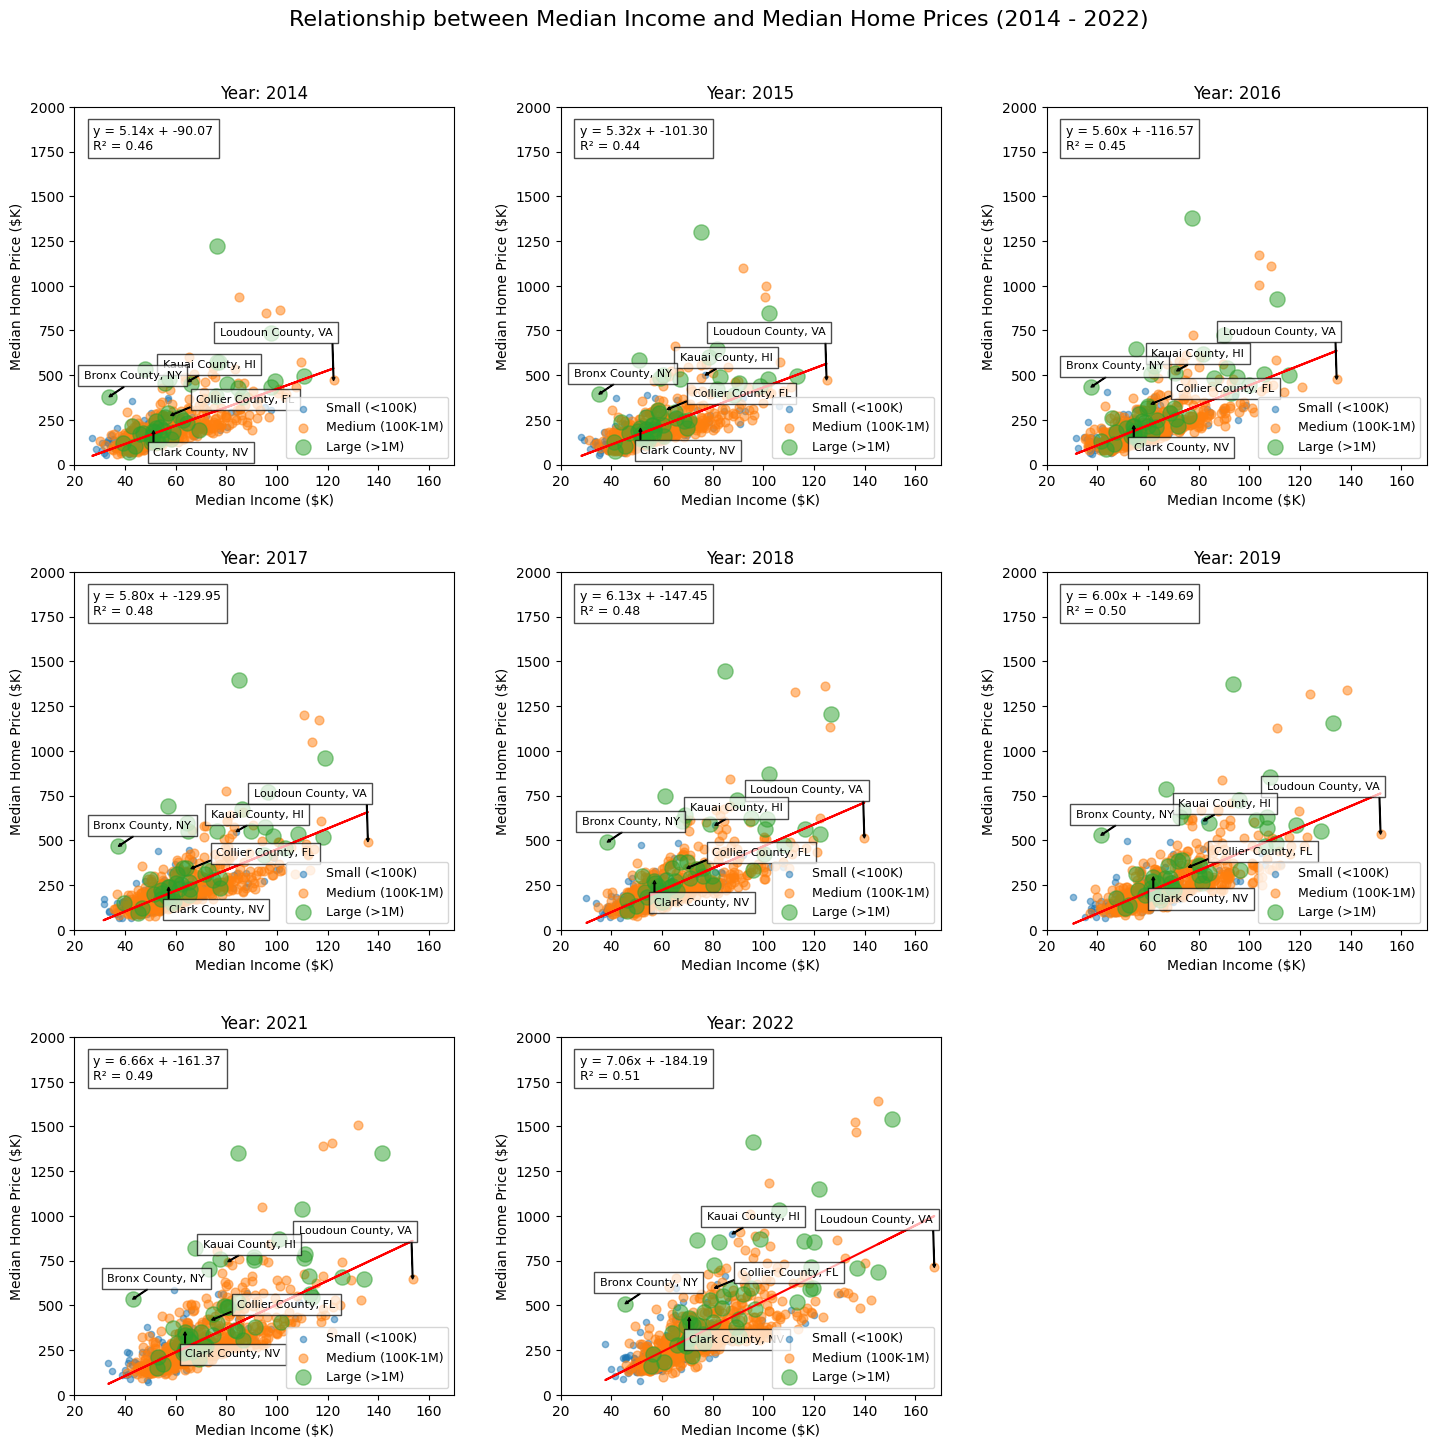

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the years of interest
years = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]

# Set up the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Define thresholds for small, medium, and large cities based on typical population sizes
small_threshold = 100000
large_threshold = 1000000

# Counties of interest
highlighted_counties = ['Loudoun County, VA', 'Kauai County, HI', 'Bronx County, NY', 'Clark County, NV', 'Collier County, FL']

# Loop through each year
for i, year in enumerate(years):
    # Filter the data for the specific year
    df_year = df_red_all[df_red_all['year'] == year]
    
    # Filter out rows where population is 0
    df_year = df_year[df_year['population'] > 0]
    
    # Categorize population into small, medium, and large cities
    def categorize_city(pop):
        if pop < small_threshold:
            return 'Small (<100K)'
        elif small_threshold <= pop <= large_threshold:
            return 'Medium (100K-1M)'
        else:
            return 'Large (>1M)'
    
    df_year['City_Size'] = df_year['population'].apply(categorize_city)
    
    # Prepare data for regression
    X = df_year['med_inc'].values.reshape(-1, 1) / 1000  # Convert to thousands
    y = df_year['all_home_val'].values / 1000  # Convert to thousands
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatter plot with different sizes for small, medium, and large cities
    for city_size, size in [('Small (<100K)', 20), ('Medium (100K-1M)', 40), ('Large (>1M)', 120)]:
        df_city_size = df_year[df_year['City_Size'] == city_size]
        axes[i].scatter(df_city_size['med_inc'] / 1000, df_city_size['all_home_val'] / 1000, s=size, label=city_size, alpha=0.5)
    
    # Plot the regression line
    axes[i].plot(X, y_pred, color='red')
    
    # Highlight specific counties with arrows pointing in different directions
    for county in highlighted_counties:
        county_data = df_year[df_year['county_state'] == county]
        if not county_data.empty:
            x_value = county_data['med_inc'].values[0] / 1000
            y_value = county_data['all_home_val'].values[0] / 1000
            
            # Adjust the text positions based on the county
            if county == 'New York County, NY':
                xytext = (x_value + 10, y_value + 100)
            elif county == 'Loudoun County, VA':
                xytext = (x_value - 45, y_value + 250)# Text above and to the right
            elif county == 'Kauai County, HI':
                xytext = (x_value - 10, y_value + 80)  # Text below and to the left
            elif county == 'Bronx County, NY':
                xytext = (x_value - 10, y_value + 100)  # Text above and to the right
            elif county == 'Clark County, NV':
                xytext = (x_value , y_value - 140)  # Text below and to the left
            elif county == 'Collier County, FL':
                xytext = (x_value + 10, y_value + 70)  # Text above and to the right
            
            axes[i].annotate(
                county,
                xy=(x_value, y_value),
                xytext=xytext,  # Position the text differently for each county
                arrowprops=dict(facecolor='gray',
                                width=0.5,
                                headwidth=2,
                                headlength=2),
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7)
            )
    
    # Add the regression equation and R² value as text, scaled to thousands
    intercept = model.intercept_
    slope = model.coef_[0]
    r_squared = model.score(X, y)
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"
    
    # Adjust position of the text box to avoid overlap
    axes[i].text(0.05, 0.95, equation, transform=axes[i].transAxes, 
                 fontsize=9, verticalalignment='top', 
                 horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
    
    # Set the title and labels
    axes[i].set_title(f'Year: {year}')
    axes[i].set_xlabel('Median Income ($K)')
    axes[i].set_ylabel('Median Home Price ($K)')
    axes[i].legend(loc='lower right', fontsize=9)  # Move legend to lower right corner to avoid overlap
    
    # Set y-axis limit
    axes[i].set_ylim(0, 2000)
    axes[i].set_xlim(20, 170)

# Turn off the last empty subplot
axes[-1].axis('off')

# Set a title for the entire figure
fig.suptitle("Relationship between Median Income and Median Home Prices (2014 - 2022)", fontsize=16)

# Adjust the layout to reduce the gap between the title and the subplots
plt.tight_layout(pad=3.0, rect=[0, 0, 1, .999])  # Decrease the top margin (last value in rect)

# Save the figure to a file
plt.savefig("Median Income and Median Home Price for each year(ALL HOMES) - Marked.svg")

# Show the plot
plt.show()


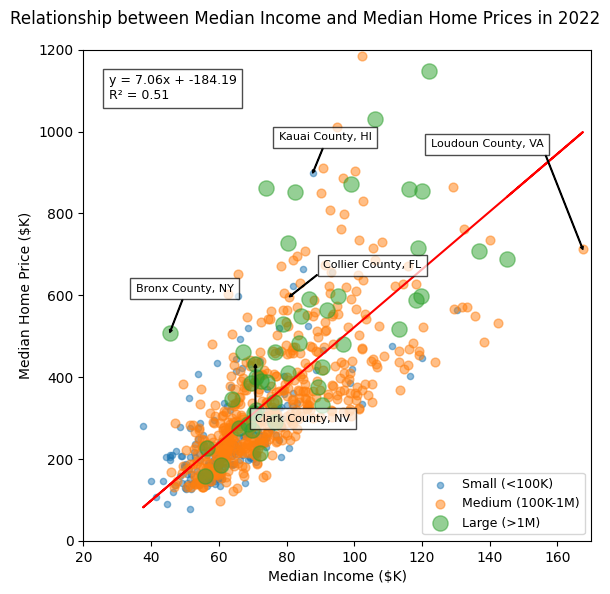

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Year of interest
year = 2022

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6,6))

# Define thresholds for small, medium, and large cities based on typical population sizes
small_threshold = 100000
large_threshold = 1000000

# Counties of interest
highlighted_counties = ['Loudoun County, VA', 'Kauai County, HI', 'Bronx County, NY', 'Clark County, NV', 'Collier County, FL']

# Filter the data for the specific year
df_year = df_red_all[df_red_all['year'] == year]

# Filter out rows where population is 0
df_year = df_year[df_year['population'] > 0]

# Categorize population into small, medium, and large cities
def categorize_city(pop):
    if pop < small_threshold:
        return 'Small (<100K)'
    elif small_threshold <= pop <= large_threshold:
        return 'Medium (100K-1M)'
    else:
        return 'Large (>1M)'

df_year['City_Size'] = df_year['population'].apply(categorize_city)

# Prepare data for regression
X = df_year['med_inc'].values.reshape(-1, 1) / 1000  # Convert to thousands
y = df_year['all_home_val'].values / 1000  # Convert to thousands

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Scatter plot with different sizes for small, medium, and large cities
for city_size, size in [('Small (<100K)', 20), ('Medium (100K-1M)', 40), ('Large (>1M)', 120)]:
    df_city_size = df_year[df_year['City_Size'] == city_size]
    ax.scatter(df_city_size['med_inc'] / 1000, df_city_size['all_home_val'] / 1000, s=size, label=city_size, alpha=0.5)

# Plot the regression line
ax.plot(X, y_pred, color='red')

# Highlight specific counties with arrows pointing in different directions
for county in highlighted_counties:
    county_data = df_year[df_year['county_state'] == county]
    if not county_data.empty:
        x_value = county_data['med_inc'].values[0] / 1000
        y_value = county_data['all_home_val'].values[0] / 1000
        
        # Adjust the text positions based on the county
        if county == 'Loudoun County, VA':
            xytext = (x_value - 45, y_value + 250)  # Text above and to the left
        elif county == 'Kauai County, HI':
            xytext = (x_value - 10, y_value + 80)  # Text above
        elif county == 'Bronx County, NY':
            xytext = (x_value - 10, y_value + 100)  # Text above
        elif county == 'Clark County, NV':
            xytext = (x_value, y_value - 140)  # Text below
        elif county == 'Collier County, FL':
            xytext = (x_value + 10, y_value + 70)  # Text above
        
        ax.annotate(
            county,
            xy=(x_value, y_value),
            xytext=xytext,  # Position the text differently for each county
            arrowprops=dict(facecolor='gray',
                            width=0.5,
                            headwidth=2,
                            headlength=2),
            fontsize=8,
            bbox=dict(facecolor='white', alpha=0.7)
        )

# Add the regression equation and R² value as text, scaled to thousands
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Adjust position of the text box to avoid overlap
ax.text(0.05, 0.95, equation, transform=ax.transAxes, 
         fontsize=9, verticalalignment='top', 
         horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))

# Set the title and labels
ax.set_xlabel('Median Income ($K)')
ax.set_ylabel('Median Home Price ($K)')
ax.legend(loc='lower right', fontsize=9)  # Move legend to lower right corner to avoid overlap

# Set y-axis limit
ax.set_ylim(0, 1200)
ax.set_xlim(20, 170)

# Set a title for the entire figure
fig.suptitle(f"Relationship between Median Income and Median Home Prices in {year}", fontsize=12)

# Adjust the layout to reduce the gap between the title and the subplots
plt.tight_layout(pad=1.0, rect=[0, 0, 1, .999])  # Decrease the top margin (last value in rect)

# Save the figure to a file
plt.savefig(f"Median Income and Median Home Price for {year}.png")

# Show the plot
plt.show()


In [ ]:
df_red_all.columns

Index(['County_fullXWalk', 'state', 'year', 'med_inc', 'population',
       'moe_med_inc', 'all_home_val', 'svf_homes_val', 'county_state',
       'county_state_count'],
      dtype='object')

/var/folders/g3/dpt4zlpd2cgbwjktw5bw2xp80000gn/T/ipykernel_64917/557420483.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



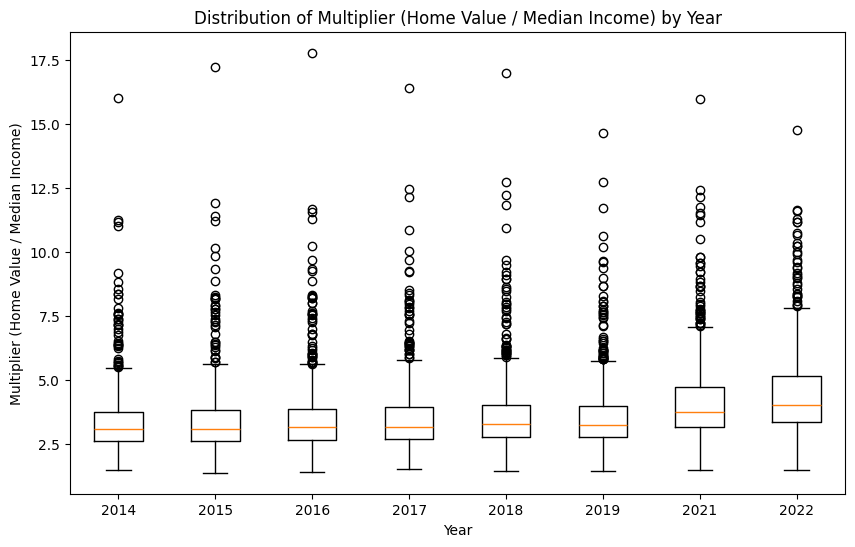

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the multiplier for each row (all_home_val / med_inc)
df_red_all['multiplier'] = df_red_all['all_home_val'] / df_red_all['med_inc']

# Group the data by year
years = sorted(df_red_all['year'].unique())
data_by_year = [df_red_all[df_red_all['year'] == year]['multiplier'].values for year in years]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_by_year, labels=years)

# Set titles and labels
plt.title('Distribution of Multiplier (Home Value / Median Income) by Year')
plt.xlabel('Year')
plt.ylabel('Multiplier (Home Value / Median Income)')

# Show the plot
plt.show()


In [ ]:
SP_df_red_all_2022 = df_red_all[df_red_all['year'] == 2022]
SP_df_red_all_2022_sorted = SP_df_red_all_2022.sort_values('multiplier')
np.median(SP_df_red_all_2022_sorted['multiplier'])

4.030893313680004

In [ ]:
SP_df_red_all_2021 = df_red_all[df_red_all['year'] == 2021]
SP_df_red_all_2021_sorted = SP_df_red_all_2021.sort_values('multiplier')
print(np.median(SP_df_red_all_2021_sorted['multiplier']))

SP_df_red_all_2014 = df_red_all[df_red_all['year'] == 2014]
SP_df_red_all_2014_sorted = SP_df_red_all_2014.sort_values('multiplier')
print(f"2014 Multiplier is: {np.median(SP_df_red_all_2014_sorted['multiplier'])}")

3.7627520218862633
2014 Multiplier is: 3.082729939336467


In [ ]:
df_exceptions_HP_LI = df_red_all['county_state'].where(
    (df_red_all['all_home_val'] > 200000) & 
    (df_red_all['all_home_val'] < 300000) & 
    (df_red_all['med_inc'] > 30000) & 
    (df_red_all['med_inc'] < 40000) & 
    (df_red_all['year'] == 2022)
).dropna()

df_exceptions_HP_LI

3843    Apache County, AZ
Name: county_state, dtype: object

In [ ]:
df_exceptions_HP_LI_HPop = df_red_all['county_state'].where(
    (df_red_all['all_home_val'] > 400000) & 
    (df_red_all['all_home_val'] < 600000) & 
    (df_red_all['med_inc'] > 40000) & 
    (df_red_all['med_inc'] < 60000) & 
    (df_red_all['year'] == 2022)
).dropna()

df_exceptions_HP_LI_HPop

1455     Humboldt County, CA
1654       Sevier County, TN
1858    Josephine County, OR
4231        Bronx County, NY
Name: county_state, dtype: object

In [ ]:
df_red_all_FL = df_red_all[df_red_all['state']=='FL']

df_red_all_FL_sorted = df_red_all_FL.sort_values('all_home_val')
df_red_all_FL_sorted

,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state,county_state_count,multiplier
980,Putnam County,FL,2014,30765,72143,3106,83980.193168,83676.890941,"Putnam County, FL",8,2.729732
1020,Putnam County,FL,2015,31483,72023,6323,87385.960231,87059.670282,"Putnam County, FL",8,2.775655
978,Highlands County,FL,2014,36120,98236,3901,87867.588468,89861.554315,"Highlands County, FL",8,2.432657
1217,Putnam County,FL,2016,38239,72277,3182,92556.576231,92170.843212,"Putnam County, FL",8,2.420476
1019,Highlands County,FL,2015,34242,99491,3264,95690.184086,97902.949824,"Highlands County, FL",8,2.794527
...,...,...,...,...,...,...,...,...,...,...,...
1478,Palm Beach County,FL,2022,76592,1518477,3667,460217.169187,574023.072495,"Palm Beach County, FL",8,6.008685
1475,Manatee County,FL,2022,72108,429125,2667,462310.389306,307218.639335,"Manatee County, FL",8,6.411361
1474,Sarasota County,FL,2022,78341,462286,1880,464074.291649,276886.336518,"Sarasota County, FL",8,5.923773
1467,Nassau County,FL,2022,90883,97899,4685,466662.803252,337950.239983,"Nassau County, FL",8,5.134765


In [ ]:
df_red_all_FL_2022 =  df_red_all_FL[df_red_all_FL['year']==2022]


df_red_all_FL_2022_sorted = df_red_all_FL_2022.sort_values('all_home_val')

df_red_all_FL_2022_sorted

,County_fullXWalk,state,year,med_inc,population,moe_med_inc,all_home_val,svf_homes_val,county_state,county_state_count,multiplier
5314,Putnam County,FL,2022,46161,74731,2940,209772.471027,5.227568e+05,"Putnam County, FL",8,4.544366
5033,Highlands County,FL,2022,52799,105618,1553,223890.657780,2.355872e+05,"Highlands County, FL",8,4.240434
4509,Columbia County,FL,2022,53985,71908,4557,248639.064173,1.908011e+05,"Columbia County, FL",8,4.605706
3961,Escambia County,FL,2022,61924,324878,1883,270949.465780,3.168283e+05,"Escambia County, FL",8,4.375516
3960,Leon County,FL,2022,61297,297369,6739,271136.046529,2.631204e+05,"Leon County, FL",8,4.423317
3860,Marion County,FL,2022,54190,396415,2203,274953.532771,2.842769e+05,"Marion County, FL",8,5.073880
3842,Citrus County,FL,2022,51532,162529,1032,281968.587994,2.609635e+05,"Citrus County, FL",8,5.471718
3543,Alachua County,FL,2022,58354,284030,2530,290710.996124,3.298658e+05,"Alachua County, FL",8,4.981852
3229,Duval County,FL,2022,70533,1016536,5942,311418.871641,5.297940e+05,"Duval County, FL",8,4.415222
3134,Polk County,FL,2022,62051,787404,2345,315477.960811,2.561502e+05,"Polk County, FL",8,5.084172


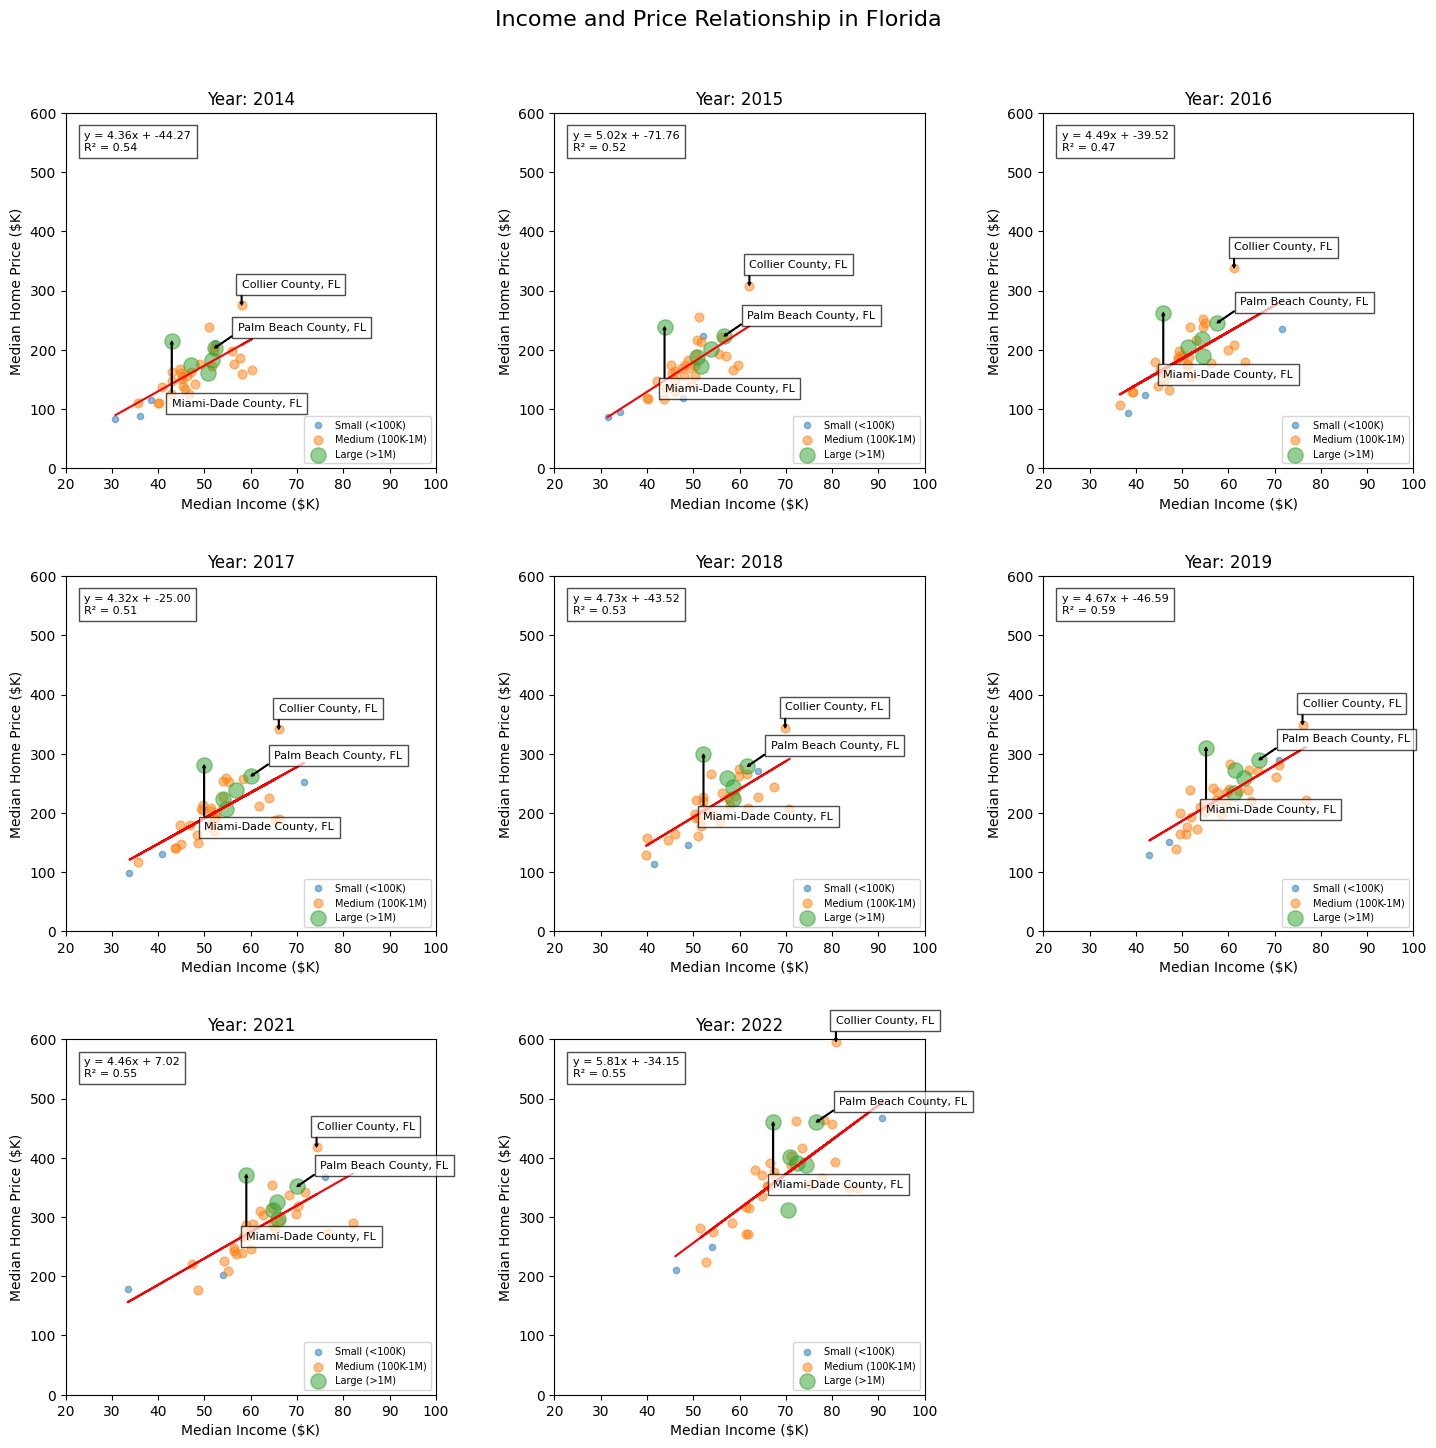

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the years of interest
years = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]

# Set up the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Define thresholds for small, medium, and large cities based on typical population sizes
small_threshold = 100000
large_threshold = 1000000

# Counties of interest
highlighted_counties = ['Palm Beach County, FL', 'Miami-Dade County, FL','Collier County, FL']

# Loop through each year
for i, year in enumerate(years):
    # Filter the data for the specific year
    df_year = df_red_all_FL[df_red_all_FL['year'] == year]
    
    # Filter out rows where population is 0
    df_year = df_year[df_year['population'] > 0]
    
    # Categorize population into small, medium, and large cities
    def categorize_city(pop):
        if pop < small_threshold:
            return 'Small (<100K)'
        elif small_threshold <= pop <= large_threshold:
            return 'Medium (100K-1M)'
        else:
            return 'Large (>1M)'
    
    df_year['City_Size'] = df_year['population'].apply(categorize_city)
    
    # Prepare data for regression
    X = df_year['med_inc'].values.reshape(-1, 1) / 1000  # Convert to thousands
    y = df_year['all_home_val'].values / 1000  # Convert to thousands
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatter plot with different sizes for small, medium, and large cities
    for city_size, size in [('Small (<100K)', 20), ('Medium (100K-1M)', 40), ('Large (>1M)', 120)]:
        df_city_size = df_year[df_year['City_Size'] == city_size]
        axes[i].scatter(df_city_size['med_inc'] / 1000, df_city_size['all_home_val'] / 1000, s=size, label=city_size, alpha=0.5)
    
    # Plot the regression line
    axes[i].plot(X, y_pred, color='red')
    
    # Highlight specific counties with arrows pointing in different directions
    for county in highlighted_counties:
        county_data = df_year[df_year['county_state'] == county]
        if not county_data.empty:
            x_value = county_data['med_inc'].values[0] / 1000
            y_value = county_data['all_home_val'].values[0] / 1000
            
            # Adjust the text positions based on the county
            if county == 'Palm Beach County, FL':
                xytext = (x_value + 5 , y_value + 30)  # Text above the bubble
            elif county == 'Collier County, FL':
                xytext = (x_value , y_value+30)
            else:  # Miami-Dade County, FL
                xytext = (x_value , y_value - 110)  # Text below the bubble
            
            axes[i].annotate(
                county,
                xy=(x_value, y_value),
                xytext=xytext,  # Position the text differently for each county
                arrowprops=dict(facecolor='gray',
                                width=0.5,
                                headwidth=2,
                                headlength = 2),
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7)
            )
    
    # Add the regression equation and R² value as text, scaled to thousands
    intercept = model.intercept_
    slope = model.coef_[0]
    r_squared = model.score(X, y)
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"
    
    # Adjust position of the text box to avoid overlap
    axes[i].text(0.05, 0.95, equation, transform=axes[i].transAxes, 
                 fontsize=8, verticalalignment='top', 
                 horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
    
    # Set the title and labels
    axes[i].set_title(f'Year: {year}')
    axes[i].set_xlabel('Median Income ($K)')
    axes[i].set_ylabel('Median Home Price ($K)')
    axes[i].legend(loc='lower right', fontsize=7)  # Move legend to lower right corner to avoid overlap
    
    # Set y-axis and x-axis limits
    axes[i].set_ylim(0, 600)
    axes[i].set_xlim(20, 100)

# Turn off the last empty subplot
axes[-1].axis('off')

# Set a title for the entire figure
fig.suptitle("Income and Price Relationship in Florida", fontsize=16)

# Adjust the layout to reduce the gap between the title and the subplots
plt.tight_layout(pad=3.0, rect=[0, 0, 1, 0.995])

# Save the figure to a file
plt.savefig("Income and Price Relationship in Florida - marked.svg")

# Show the plot
plt.show()


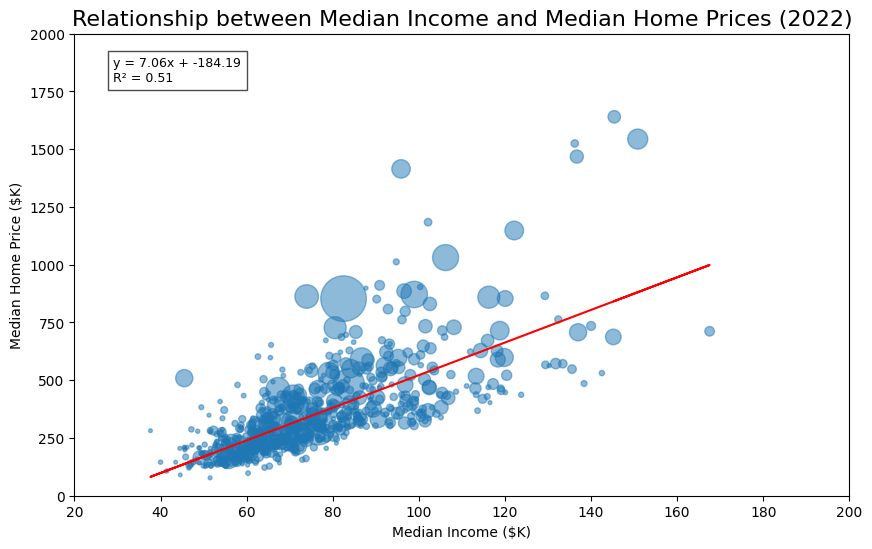

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Filter the data for the year 2022
year = 2022
df_year = df_red_all[df_red_all['year'] == year]

# Filter out rows where population is 0
df_year = df_year[df_year['population'] > 0]

# Prepare data for regression
X = df_year['med_inc'].values.reshape(-1, 1) / 1000  # Convert to thousands
y = df_year['all_home_val'].values / 1000  # Convert to thousands

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a bubble chart, with the size of each dot proportional to its population
plt.scatter(df_year['med_inc'] / 1000, df_year['all_home_val'] / 1000, 
            s=df_year['population'] / 9000,  # Adjust this divisor to change bubble sizes
            alpha=0.5)

# Plot the regression line
plt.plot(df_year['med_inc'] / 1000, y_pred, color='red')

# Add the regression equation and R² value as text, scaled to thousands
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}"

# Position the equation text box
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, 
         fontsize=9, verticalalignment='top', 
         horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))

# Set the title and labels
plt.title('Relationship between Median Income and Median Home Prices (2022)', fontsize=16)
plt.xlabel('Median Income ($K)')
plt.ylabel('Median Home Price ($K)')

# Set y-axis limit
plt.ylim(0, 2000)
plt.xlim(20, 200)

# Show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LinearRegression

# Filter the data for the year 2022
year = 2022
df_year = df_red_all[df_red_all['year'] == year]

# Filter out rows where population is 0
df_year = df_year[df_year['population'] > 0]

# Prepare data for regression
X = df_year['med_inc'].values.reshape(-1, 1) / 1000  # Convert to thousands
y = df_year['all_home_val'].values / 1000  # Convert to thousands

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Add the regression line to the DataFrame for Plotly
df_year['Predicted_Home_Value'] = y_pred

# Create the interactive bubble chart with Plotly
fig = px.scatter(
    df_year,
    x='med_inc',
    y='all_home_val',
    size='population',
    hover_name='county_state',  # Add rollover label
    hover_data={
        'med_inc': ':.2f',  # Format median income
        'all_home_val': ':.2f',  # Format median home value
        'population': ':.0f'  # Show population as an integer
    },
    labels={
        'med_inc': 'Median Income ($K)',
        'all_home_val': 'Median Home Price ($K)',
        'population': 'Population'
    },
    title="Relationship between Median Income and Median Home Prices (2022)",
    trendline="ols",  # Add the regression line
    trendline_color_override="red",  # Set the regression line color to red
)

# Customize the layout
fig.update_layout(
    height=600,
    width=1000,
    xaxis_title="Median Income ($K)",
    yaxis_title="Median Home Price ($K)",
    showlegend=False  # Hide the legend since we don't have multiple series
)

# save the figure as an SVG file called 2022
fig.write_image("2022.svg")

# Show the plot
fig.show()

In [ ]:
# what is the current path?
import os
os.getcwd()


'/Users/azizsunderji/Library/Caches/Spark Desktop/messagesData/1/14513'

In [49]:
import plotly.express as px
import pandas as pd

# Filter the data for places with population > 1,000,000
df_filtered = df_red_all[df_red_all['population'] > 1000000]

# Filter the data for the selected years
years = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]
df_selected_years = df_filtered[df_filtered['year'].isin(years)]

# Filter the data for 2022
df_2022 = df_selected_years[df_selected_years['year'] == 2022]

# Create the scatter plot for 2022 data points
fig = px.scatter(
    df_2022,
    x='med_inc',
    y='all_home_val',
    size='population',
    color_discrete_sequence=['blue'],
    hover_name='county_state',
    hover_data={
        'med_inc': ':.2f',
        'all_home_val': ':.2f',
        'year': ':.0f'
    },
    labels={
        'med_inc': 'Median Income ($K) - 2022',
        'all_home_val': 'Median Home Price ($K) - 2022',
        'population': 'Population (2022)'
    },
    title="Income vs Home Prices (2014-2022) with 2022 Emphasis"
)

# Add lines connecting 2014-2021 data points to 2022
for county_state in df_selected_years['county_state'].unique():
    df_county = df_selected_years[df_selected_years['county_state'] == county_state]
    df_county = df_county.sort_values(by='year')

    for i in range(len(df_county) - 1):
        if df_county.iloc[i]['year'] != 2022:  # Only connect if the year is not 2022
            fig.add_shape(
                type='line',
                x0=df_county.iloc[i]['med_inc'],
                y0=df_county.iloc[i]['all_home_val'],
                x1=df_county.iloc[i+1]['med_inc'],
                y1=df_county.iloc[i+1]['all_home_val'],
                line=dict(color='gray', width=1)
            )

# Customize the layout
fig.update_layout(
    height=600,
    width=1000,
    xaxis_title="Median Income ($K)",
    yaxis_title="Median Home Price ($K)",
    showlegend=False  # Hide the legend since we don't have multiple series
)

# Save the figure as an SVG file called 2022
fig.write_image("2022.svg")

# Show the plot
fig.show()


In [52]:
import plotly.graph_objs as go
import pandas as pd

# Filter the data for places with population > 1,000,000
df_filtered = df_red_all[df_red_all['population'] > 1000000]

# Filter the data for the selected years
years = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]
df_selected_years = df_filtered[df_filtered['year'].isin(years)]

# Filter the data for 2022
df_2022 = df_selected_years[df_selected_years['year'] == 2022]

# Create the scatter plot for 2022 data points
trace_2022 = go.Scatter(
    x=df_2022['med_inc'],
    y=df_2022['all_home_val'],
    mode='markers',
    marker=dict(
        size=df_2022['population'] / 100000,
        color='blue',
        opacity=0.7,  # Set higher opacity
    ),
    text=df_2022['county_state'],
    hoverinfo='text',
    hovertemplate="<b>%{text}</b><br><br>" +
                  "Median Income: %{x:.2f}K<br>" +
                  "Home Value: %{y:.2f}K<br>" +
                  "<extra></extra>",  # Removes the trace name on hover
    name='2022'
)

# Add lines connecting 2014-2021 data points to 2022
lines = []
for county_state in df_selected_years['county_state'].unique():
    df_county = df_selected_years[df_selected_years['county_state'] == county_state]
    df_county = df_county.sort_values(by='year')

    for i in range(len(df_county) - 1):
        if df_county.iloc[i]['year'] != 2022:  # Only connect if the year is not 2022
            line = go.Scatter(
                x=[df_county.iloc[i]['med_inc'], df_county.iloc[i+1]['med_inc']],
                y=[df_county.iloc[i]['all_home_val'], df_county.iloc[i+1]['all_home_val']],
                mode='lines',
                line=dict(color='gray', width=1),
                hoverinfo='skip',  # Skip hover for lines
                opacity=0.3,  # Lower opacity for tails
                showlegend=False
            )
            lines.append(line)

# Combine the scatter plot and the lines
data = lines + [trace_2022]

# Create the layout with hovermode set to closest for interactivity
layout = go.Layout(
    title="Income vs Home Prices (2014-2022) with 2022 Emphasis",
    xaxis=dict(title="Median Income ($K)"),
    yaxis=dict(title="Median Home Price ($K)"),
    hovermode='closest',
    showlegend=False,
    height=600,
    width=1000,
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Save the figure as an SVG file called 2022
fig.write_image("2022.svg")

# Show the plot
fig.show()


In [53]:
pip install altair vega_datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/azizsunderji/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/Users/azizsunderji/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/Users/azizsunderji/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/Users/azizsunderji/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/commands/install.py", line 483, in run
    installed_versions[distribution.canonical_name] = d

In [64]:
import altair as alt
import pandas as pd

# Filter the data for places with population > 1,000,000
df_filtered = df_red_all[df_red_all['population'] > 1000000]

# Filter the data for the selected years (excluding 2020)
years = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]
df_selected_years = df_filtered[df_filtered['year'].isin(years)]

# Create a selection for highlighting, tied specifically to the 2022 bubbles
highlight = alt.selection_single(on='click', empty='none', fields=['county_state'])

# Base chart
base = alt.Chart(df_selected_years).encode(
    x=alt.X('med_inc:Q', title='Median Income ($K)'),
    y=alt.Y('all_home_val:Q', title='Median Home Price ($K)'),
    tooltip=[
        alt.Tooltip('county_state:N', title='County/State'),
        alt.Tooltip('year:O', title='Year'),
        alt.Tooltip('med_inc:Q', title='Median Income ($K)', format=',d'),
        alt.Tooltip('all_home_val:Q', title='Median Home Price ($K)', format=',d')
    ]
)

# Lines connecting the data points, conditional on 2022 bubble selection
lines = base.mark_line().encode(
    detail='county_state:N',
    opacity=alt.condition(highlight, alt.value(0.8), alt.value(0.2)),
    color=alt.value('gray')
)

# Points for 2022 with size proportional to population, filled with #0bb4ff, and outlined in white
points_2022 = base.mark_point(filled=True).encode(
    size=alt.Size('population:Q', scale=alt.Scale(range=[200, 1500]), title='Population'),  # Further increased size range
    color=alt.value('#0bb4ff'),
    stroke=alt.value('white'),
    strokeWidth=alt.value(1),
    opacity=alt.value(1),
).add_selection(
    highlight
).transform_filter(
    alt.datum.year == 2022  # Only show 2022 points
)

# Small nodes for each year pre-2022 (excluding 2020) with white outline, filled on highlight
nodes = base.mark_point().encode(
    size=alt.value(50),  # Small, equally sized nodes
    fill=alt.condition(highlight, alt.value('#0bb4ff'), alt.value(None)),  # Fill with #0bb4ff on highlight
    stroke=alt.value('white'),
    strokeWidth=alt.value(1),
    color=alt.value('lightgray'),  # Outline color remains lightgray when not highlighted
    opacity=alt.condition(highlight, alt.value(1), alt.value(0.5))  # Higher opacity when highlighted
).transform_filter(
    alt.datum.year != 2022  # Exclude 2022
)

# Combine lines, 2022 points, and pre-2022 nodes, and increase the chart size
chart = (lines + points_2022 + nodes).properties(
    width=1000,  # Set the width to 1000 pixels
    height=800   # Set the height to 800 pixels
)

# Show the chart
chart.show()


/var/folders/b2/9rsg81y55wg0tr9pnv59jk7r0000gn/T/ipykernel_53582/1883404872.py:12: AltairDeprecationWarning:

Deprecated in `altair=5.0.0`. Use selection_point instead.

/var/folders/b2/9rsg81y55wg0tr9pnv59jk7r0000gn/T/ipykernel_53582/1883404872.py:34: AltairDeprecationWarning:

Deprecated in `altair=5.0.0`. Use add_params instead.



alt.LayerChart(...)

In [77]:
import plotly.express as px
import pandas as pd
import numpy as np

# Filter the data for places with population > 1,000,000
df_filtered = df_red_all[df_red_all['population'] > 1000000]

# Filter the data for the selected years
years = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]
df_selected_years = df_filtered[df_filtered['year'].isin(years)]

# Filter the data for 2022
df_2022 = df_selected_years[df_selected_years['year'] == 2022]

# Create the scatter plot for 2022 data points
fig = px.scatter(
    df_2022,
    x='med_inc',
    y='all_home_val',
    size='population',
    color_discrete_sequence=['#0bb4ff'],  # Use the specified color for 2022 bubbles
    hover_name='county_state',
    hover_data={
        'med_inc': ':.2f',
        'all_home_val': ':.2f',
        'year': ':.0f'
    },
    labels={
        'med_inc': 'Median Income ($K) - 2022',
        'all_home_val': 'Median Home Price ($K) - 2022',
        'population': 'Population (2022)'
    },
    title="Income vs Home Prices (2014-2022) with 2022 Emphasis"
)

# Add lines connecting 2014-2021 data points to 2022
for county_state in df_selected_years['county_state'].unique():
    df_county = df_selected_years[df_selected_years['county_state'] == county_state]
    df_county = df_county.sort_values(by='year')
    
    # Correctly apply the gradient color: lighter in 2014, darker as it approaches 2022
    for i in range(len(df_county) - 1):
        year_fraction = i / (len(df_county) - 1)
        color = f'rgba(11, 180, 255, {year_fraction})'  # Fades from lighter to darker as it approaches 2022

        fig.add_shape(
            type='line',
            x0=df_county.iloc[i]['med_inc'],
            y0=df_county.iloc[i]['all_home_val'],
            x1=df_county.iloc[i+1]['med_inc'],
            y1=df_county.iloc[i+1]['all_home_val'],
            line=dict(color=color, width=1)
        )

# Customize the layout
fig.update_traces(
    marker=dict(
        opacity=1.0,  # Make the 2022 bubbles 100% opaque
        line=dict(width=0)  # Remove the outline from 2022 bubbles
    )
)

fig.update_layout(
    height=600,
    width=1000,
    xaxis_title="Median Income ($K)",
    yaxis_title="Median Home Price ($K)",
    yaxis=dict(
        range=[0, 1800000],
        showgrid=True,  # Show horizontal gridlines
        gridcolor='#e2e3e4',  # Set the gridline color
        gridwidth=0.5  # Set the gridline width
    ),
    xaxis=dict(
        showgrid=True,  # Show vertical gridlines
        gridcolor='#e2e3e4',  # Set the gridline color
        gridwidth=0.5  # Set the gridline width
    ),
    plot_bgcolor='#f6f7f3',  # Set background color of the plot to #f6f7f3
    paper_bgcolor='#f6f7f3',  # Set the paper (overall) background color to #f6f7f3
    showlegend=False  # Hide the legend since we don't have multiple series
)

# Save the figure as an SVG file called 2022
fig.write_image("2022.svg")

# Show the plot
fig.show()
